###### Building a Health Recommendation System

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler , LabelEncoder 
from sklearn.preprocessing import LabelEncoder , OneHotEncoder ,MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("healthcare_dataset.csv")

In [3]:
df.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
#size of the dataset
df.shape

(55500, 15)

In [6]:
#checking the datatypes
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [7]:
# checking for null values
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [8]:
#summary of integer features
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [9]:
#checking for duplicate values
df.duplicated().sum()

534

In [10]:
# dropping dulpicate values
df.drop_duplicates(inplace = True)


In [11]:
#convert datatype to date
df['Date of Admission']=pd.to_datetime(df['Date of Admission'])
df['Discharge Date']=pd.to_datetime(df['Discharge Date'])
df.dtypes

Name                          object
Age                            int64
Gender                        object
Blood Type                    object
Medical Condition             object
Date of Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
dtype: object

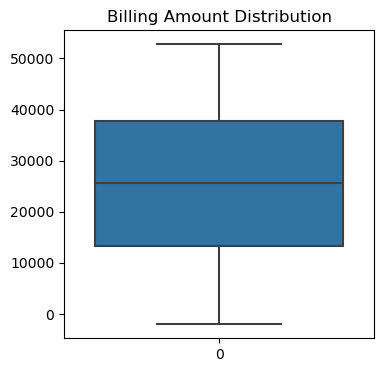

In [12]:
#checking for outliers
plt.figure(figsize=(4,4))
sns.boxplot(df['Billing Amount'])
plt.title('Billing Amount Distribution')
plt.show()


In [13]:
#now we discover that there is no outliers

In [14]:
df['Gender'].value_counts()

Gender
Male      27496
Female    27470
Name: count, dtype: int64

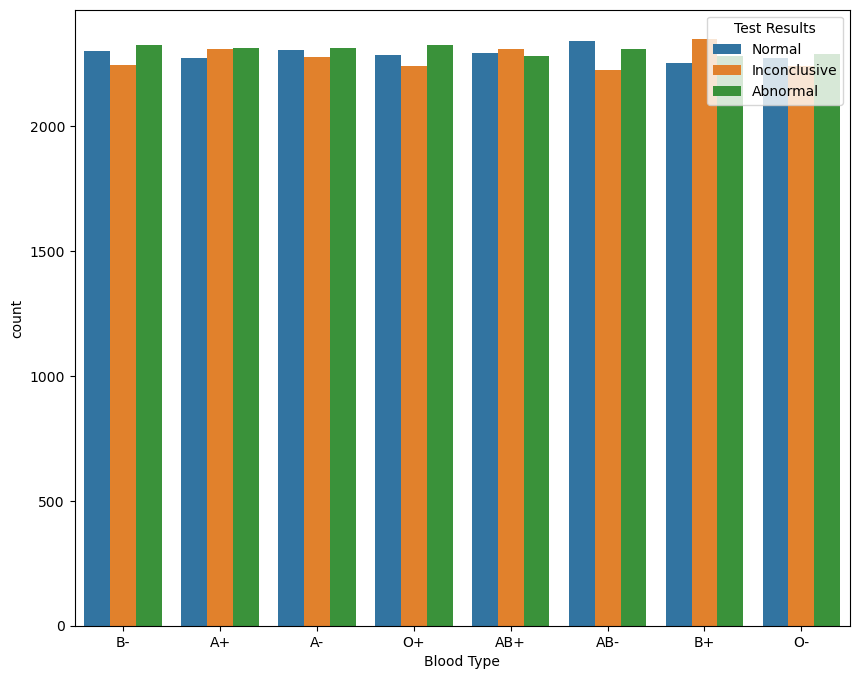

In [15]:
#how many blood type in each class¶
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Blood Type',hue='Test Results')

plt.show()

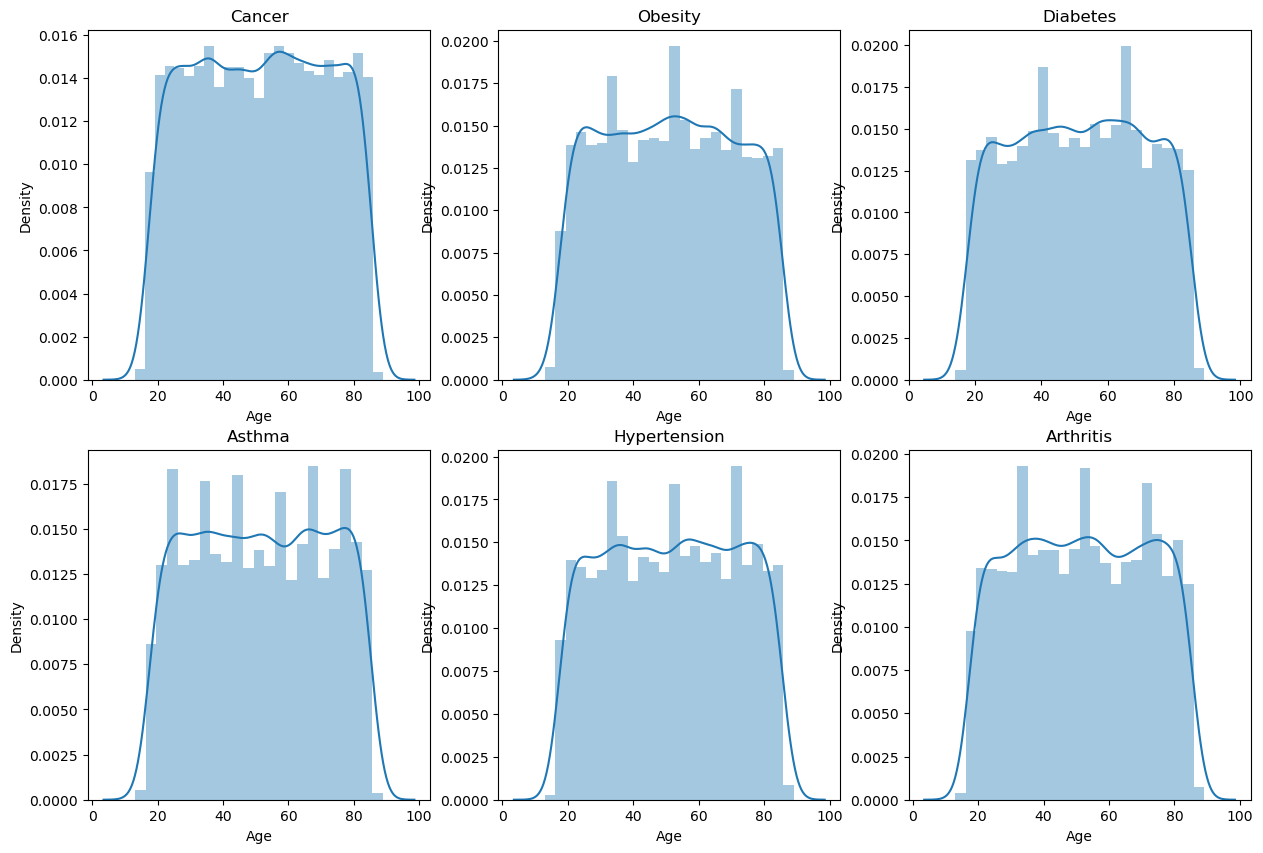

In [16]:
#relationship between medical condition and age
plt.figure(figsize=(15,10))
for index,i in enumerate(df['Medical Condition'].unique()):
    plt.subplot(2,3,index+1)
    sns.distplot(df[df['Medical Condition']==i]['Age'])
    plt.title(i)
    
plt.show()

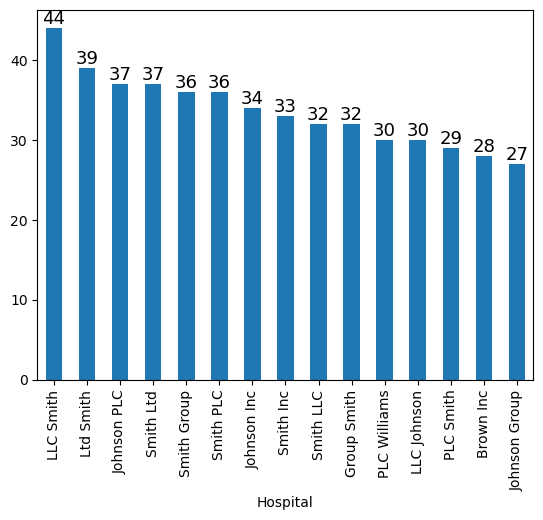

In [17]:
#which hospital receives more patients
ax=df['Hospital'].value_counts(ascending=False).head(15).plot(kind='bar')
ax.bar_label(ax.containers[0],fontsize=13)
plt.show()

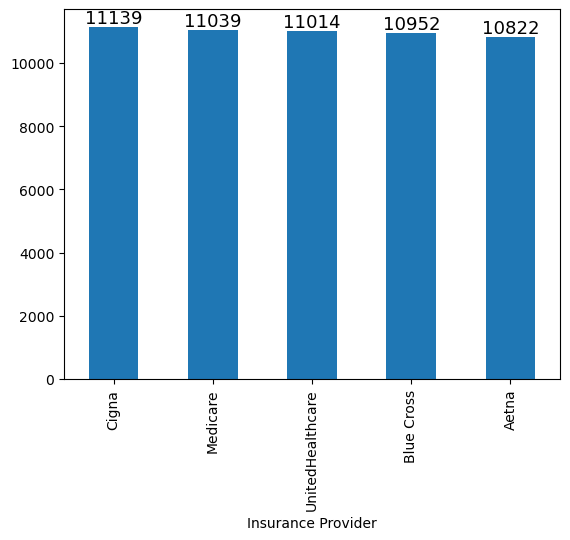

In [18]:
#which Insurance Providers have more patients
ax=df['Insurance Provider'].value_counts(ascending=False).plot(kind='bar')
ax.bar_label(ax.containers[0],fontsize=13)
plt.show()

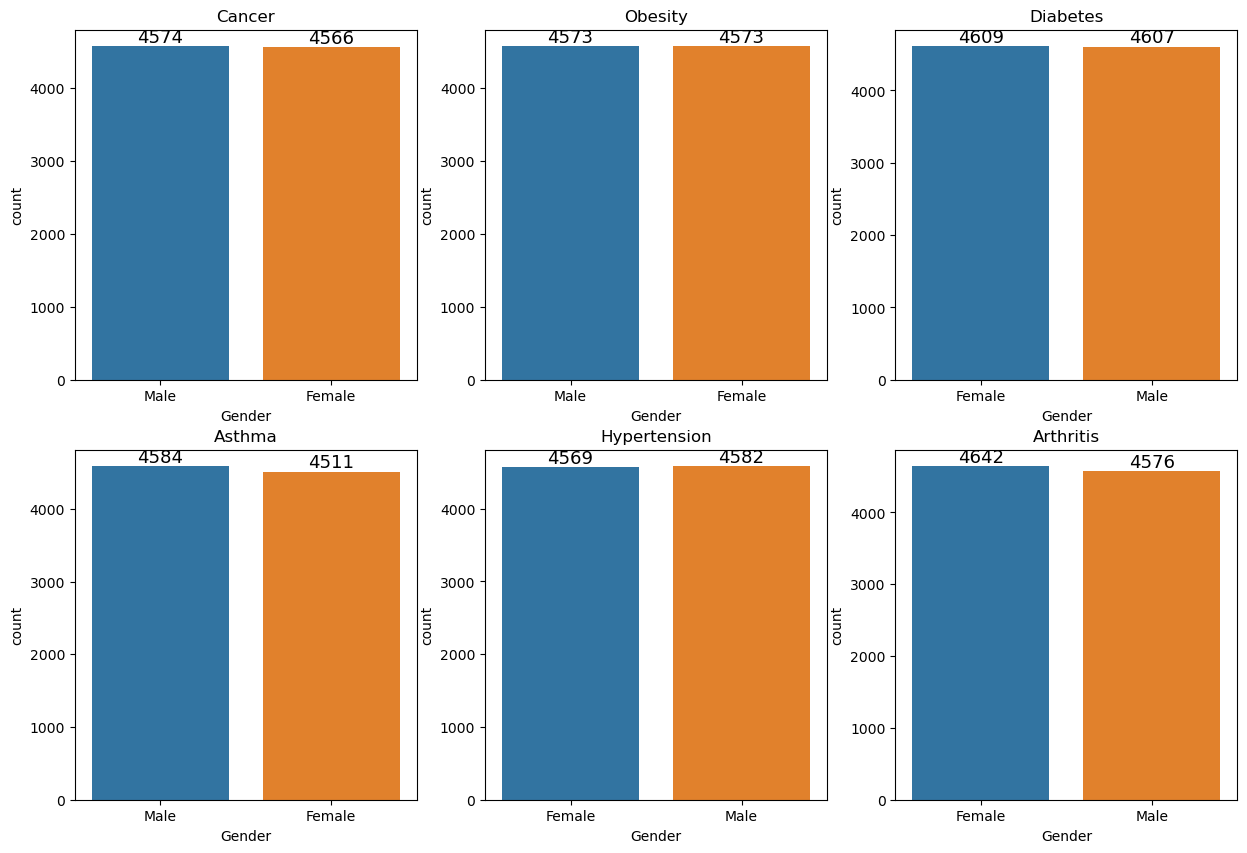

In [19]:
#how many males and females in each Medical Condition
plt.figure(figsize=(15,10))
for index,i in enumerate(df['Medical Condition'].unique()):
    plt.subplot(2,3,index+1)
    ax=sns.countplot(data=df[df['Medical Condition']==i],x='Gender')
    ax.bar_label(ax.containers[0],fontsize=13)
   
    plt.title(i)
    
plt.show()

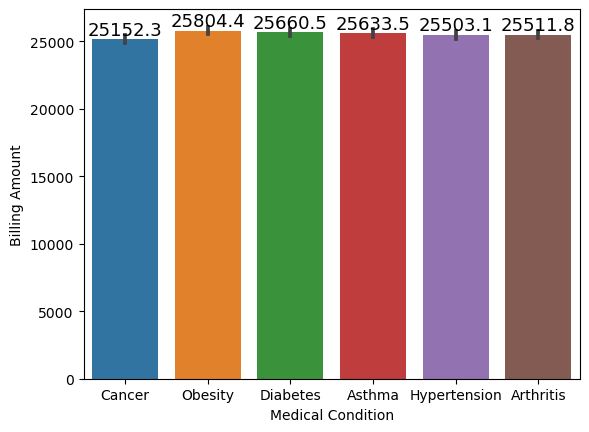

In [20]:
#How much medical condition cost
ax=sns.barplot(x='Medical Condition',y='Billing Amount',data=df)
ax.bar_label( ax.containers[0],fontsize=13)
plt.show()

In [21]:
le = LabelEncoder()

# Encode categorical variables
df['Gender'] = le.fit_transform(df['Gender'])
df['Blood Type'] = le.fit_transform(df['Blood Type'])
df['Medical Condition'] = le.fit_transform(df['Medical Condition'])
df['Admission Type'] = le.fit_transform(df['Admission Type'])
df['Medication'] = le.fit_transform(df['Medication'])

# Check the encoded DataFrame
print(df)

                    Name  Age  Gender  Blood Type  Medical Condition  \
0          Bobby JacksOn   30       1           5                  2   
1           LesLie TErRy   62       1           0                  5   
2            DaNnY sMitH   76       0           1                  5   
3           andrEw waTtS   28       0           6                  3   
4          adrIENNE bEll   43       0           2                  2   
...                  ...  ...     ...         ...                ...   
55495  eLIZABeTH jaCkSOn   42       0           6                  1   
55496         KYle pEREz   61       0           3                  5   
55497       HEATher WaNG   38       0           4                  4   
55498     JENniFER JOneS   43       1           7                  0   
55499       jAMES GARCiA   53       0           6                  0   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith               Sons

In [22]:
# Prepare features for k-NN (age + encoded categorical features)
X = df[['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication']]

In [23]:
# Train the Nearest Neighbors model
knn = NearestNeighbors(n_neighbors=3, metric='euclidean')
knn.fit(X)

NearestNeighbors(metric='euclidean', n_neighbors=3)

In [24]:
# Define health tips for cancer, obesity, diabetes, asthma, hypertension, arthritis
health_tips = {
    2: ['Avoid smoking', 'Eat a balanced diet', 'Regular screenings'],
    5: ['Maintain a calorie deficit', 'Exercise regularly', 'Follow a healthy diet'],
    3: ['Monitor blood sugar', 'Exercise regularly', 'Maintain a balanced diet'],
    1: ['Use inhaler regularly', 'Avoid triggers', 'Keep indoor air clean'],
    4: ['Reduce salt intake', 'Regular BP monitoring', 'Exercise'],
    0: ['Stay active', 'Maintain a healthy weight', 'Use joint-friendly exercises']
}


In [25]:
def get_knn_recommendations(user_index, n_recommendations=3):
    distances, indices = knn.kneighbors([X.iloc[user_index]], n_neighbors=n_recommendations+1)
    
    # Get the medical conditions of the neighbors
    neighbor_conditions = df.iloc[indices.flatten()[1:]]['Medical Condition']
    
    # Suggest tips based on neighbor conditions
    recommended_tips = []
    for condition in neighbor_conditions:
        tips = health_tips.get(condition, [])
       
        recommended_tips.extend(tips)
    
    return set(recommended_tips)  # Return unique tips

In [26]:
# Example: Get recommendations for user at index 0
user_index = 0
recommendations = get_knn_recommendations(user_index)
print(f"Recommended health tips for user {user_index}: {recommendations}")

Recommended health tips for user 0: {'Regular screenings', 'Avoid smoking', 'Eat a balanced diet'}


In [27]:
user_index =5
recommendations = get_knn_recommendations(user_index)
print(f"Recommended health tips for user {user_index}: {recommendations}")

Recommended health tips for user 5: {'Avoid triggers', 'Use inhaler regularly', 'Keep indoor air clean'}
